# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

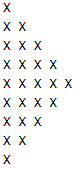

Avoid using trivial solutions like:

print('X')

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [1]:
def print_x_pattern(n: int) -> None:

    if n <= 0:
        return

    lengths = list(range(1, n + 1)) + list(range(n - 1, 0, -1))

    for k in lengths:
        print(" ".join(["X"] * k))


print_x_pattern(5)

X
X X
X X X
X X X X
X X X X X
X X X X
X X X
X X
X


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [2]:
input_str = "n45as29@#8ss6"

total = 0
for ch in input_str:
    if "0" <= ch <= "9":
        total += ord(ch) - ord("0")

print(total)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [3]:
def int_to_binary_str(n: int) -> str:
    if n == 0:
        return "0"

    sign = ""
    if n < 0:
        sign = "-"
        n = -n

    bits = []
    while n > 0:
        bits.append(str(n % 2))
        n //= 2

    return sign + "".join(reversed(bits))


print(int_to_binary_str(13))   # 1101
print(int_to_binary_str(0))    # 0
print(int_to_binary_str(-13))  # -1101

1101
0
-1101


## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [4]:
def fibonacci_iterative(upper_threshold: int) -> list[int]:
    if upper_threshold <= 0:
        return []

    out = []
    a, b = 0, 1
    while a < upper_threshold:
        out.append(a)
        a, b = b, a + b
    return out


print(fibonacci_iterative(10))  # [0, 1, 1, 2, 3, 5, 8]

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [9]:
import random

def rock_paper_scissors() -> None:
    choices = ["rock", "paper", "scissors"]
    computer = random.choice(choices)

    user = input("Your move (rock/paper/scissors): ").strip().lower()
    if user not in choices:
        print("Invalid input.")
        return

    print(f"Computer: {computer}")

    if user == computer:
        print("It is a tie")
        return

    wins = {
        ("rock", "scissors"),
        ("paper", "rock"),
        ("scissors", "paper"),
    }

    if (user, computer) in wins:
        print("You win")
    else:
        print("You lose")

rock_paper_scissors()

Your move (rock/paper/scissors): rock
Computer: scissors
You win


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds.

Notes:
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

In [11]:
import random

def rock_paper_scissors_n(rounds: int) -> None:
    if rounds <= 0:
        print("Rounds must be > 0")
        return

    choices = ["rock", "paper", "scissors"]
    wins = {
        ("rock", "scissors"),
        ("paper", "rock"),
        ("scissors", "paper"),
    }

    user_score = 0
    comp_score = 0

    for r in range(1, rounds + 1):
        computer = random.choice(choices)

        user = input(f"[Round {r}/{rounds}] Your move (rock/paper/scissors): ").strip().lower()
        if user not in choices:
            print("Invalid input -> round skipped")
            print(f"Score: You {user_score} : {comp_score} Computer\n")
            continue

        print(f"Computer: {computer}")

        if user == computer:
            print("It is a tie")
        elif (user, computer) in wins:
            print("You win")
            user_score += 1
        else:
            print("You lose")
            comp_score += 1

        print(f"Score: You {user_score} : {comp_score} Computer\n")

    if user_score > comp_score:
        print("Final result: You win")
    elif user_score < comp_score:
        print("Final result: You lose")
    else:
        print("Final result: It is a tie")

rock_paper_scissors_n(5)

[Round 1/5] Your move (rock/paper/scissors): paper
Computer: scissors
You lose
Score: You 0 : 1 Computer

[Round 2/5] Your move (rock/paper/scissors): Scissors
Computer: paper
You win
Score: You 1 : 1 Computer

[Round 3/5] Your move (rock/paper/scissors): rock
Computer: rock
It is a tie
Score: You 1 : 1 Computer

[Round 4/5] Your move (rock/paper/scissors): rock
Computer: scissors
You win
Score: You 2 : 1 Computer

[Round 5/5] Your move (rock/paper/scissors): rock
Computer: paper
You lose
Score: You 2 : 2 Computer

Final result: It is a tie


# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [13]:
import numpy as np
import time

In [14]:
def create_array_nxn(n: int) -> np.ndarray:
    if not isinstance(n, int) or n <= 0:
        raise ValueError("n must be a positive integer")
    return np.arange(n*n - 1, -1, -1).reshape(n, n)

In [15]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    rows, cols = out.shape
    for i in range(rows):
        for j in range(cols):
            if out[i, j] < threshold:
                out[i, j] = 0
    return out

In [16]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    out = arr.copy()
    out[out < threshold] = 0
    return out

In [17]:
def compare_performance(n: int, threshold: int) -> None:
    arr = create_array_nxn(n)

    t0 = time.time()
    _ = apply_threshold_loop(arr, threshold)
    t1 = time.time()

    t2 = time.time()
    _ = apply_threshold_vectorized(arr, threshold)
    t3 = time.time()

    print(f"Loop-based:       {t1 - t0:.6f} s")
    print(f"Vectorized NumPy: {t3 - t2:.6f} s")

compare_performance(1000, 200000)

Loop-based:       0.245303 s
Vectorized NumPy: 0.007845 s


## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

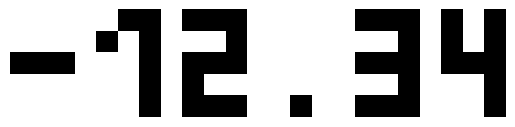

In [26]:
import numpy as np
import matplotlib.pyplot as plt

numbs = {
    "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
    "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]),
    "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]),
    "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
    "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]),
    "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]),
    "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]),
    "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]),
}

def show_in_digi(input_number) -> None:
    s = str(input_number)

    minus = np.array([
        [0,0,0],
        [0,0,0],
        [1,1,1],
        [0,0,0],
        [0,0,0],
    ])
    dot = np.array([
        [0,0,0],
        [0,0,0],
        [0,0,0],
        [0,0,0],
        [0,1,0],
    ])
    space = np.zeros((5, 1), dtype=int)

    parts = []
    for ch in s:
        if ch in numbs:
            parts.append(numbs[ch])
        elif ch == "-":
            parts.append(minus)
        elif ch == ".":
            parts.append(dot)
        else:
            raise ValueError(f"Unsupported character: {ch}")

    canvas = parts[0]
    for part in parts[1:]:
        canvas = np.concatenate((canvas, space, part), axis=1)

    plt.imshow(canvas, cmap="gray_r")
    plt.axis("off")
    plt.show()


#show_in_digi(5289)
show_in_digi(-12.34)

In [18]:
import matplotlib.pyplot as plt

show_in_digi(5289) will show:


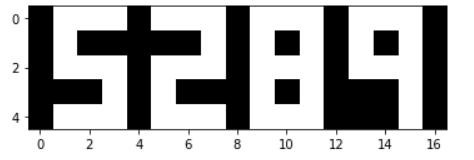

*hint2: you may find the following dict usefull*

In [ ]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
  }

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

- check what *dataset.describe()* does

- display all rows where *total_bedrooms* column is bigger than 310

- drop also first and last row

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

- Create a Correlation Matrix from all columns

In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

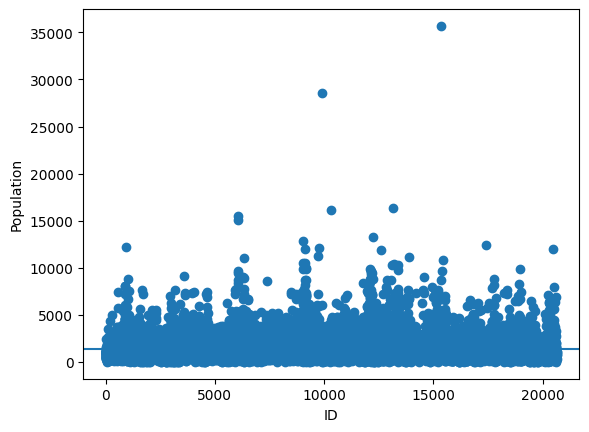

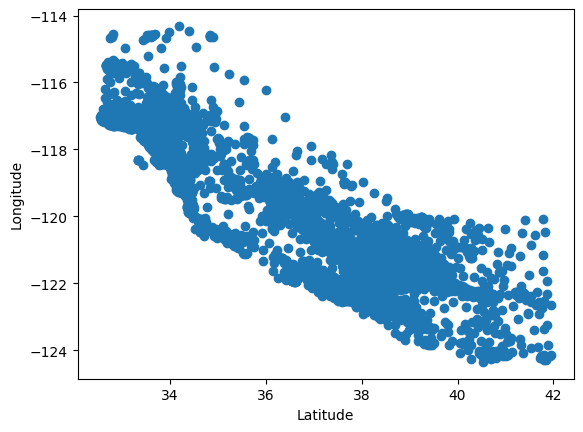

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119207  0.326873  -0.062027    0.004945  0.018773   
HouseAge    -0.119207  1.000000 -0.153320  -0.077737   -0.296221  0.013192   
AveRooms     0.326873 -0.153320  1.000000   0.847636   -0.072186 -0.004851   
AveBedrms   -0.062027 -0.077737  0.847636   1.000000   -0.066206 -0.006181   
Population   0.004945 -0.296221 -0.072186  -0.066206    1.000000  0.069862   
AveOccup     0.018773  0.013192 -0.004851  -0.006181    0.069862  1.000000   
Latitude    -0.079882  0.011209  0.106375   0.069724   -0.108746  0.002373   
Longitude   -0.015060 -0.108186 -0.027504   0.013341    0.099717  0.002471   
MedHouseVal  0.687989  0.105492  0.151902  -0.046684   -0.024555 -0.023738   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079882  -0.015060     0.687989  
HouseAge     0.011209  -0.108186     0.105492  
AveRooms     0.106375  -0.027504     0.151902  
AveBedrms    0.069724   0.0

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

print(df.describe())

col_bed = "total_bedrooms" if "total_bedrooms" in df.columns else "AveBedrms"

filtered = df[df[col_bed] > 310]
print(filtered)

df2 = df.iloc[1:-1].copy()

col_house = "households" if "households" in df2.columns else "Population"
mean_house = df2[col_house].mean()

plt.figure()
plt.scatter(df2.index, df2[col_house])  # dots
plt.axhline(mean_house)                 # mean line
plt.xlabel("ID")
plt.ylabel(col_house)
plt.show()

if df2.isna().any().any():
    df2 = df2.apply(lambda s: s.fillna(s.mean()) if s.dtype.kind in "biufc" else s)

lat_col = "lat" if "lat" in df2.columns else "Latitude"
lon_col = "long" if "long" in df2.columns else "Longitude"

plt.figure()
plt.scatter(df2[lat_col], df2[lon_col])
plt.xlabel(lat_col)
plt.ylabel(lon_col)
plt.show()

numeric_cols = [c for c in df2.columns if pd.api.types.is_numeric_dtype(df2[c])]
c1, c2 = numeric_cols[0], numeric_cols[1]

def minmax(series: pd.Series) -> pd.Series:
    mn, mx = series.min(), series.max()
    if mx == mn:
        return series * 0
    return (series - mn) / (mx - mn)

df2[c1] = minmax(df2[c1])
df2[c2] = minmax(df2[c2])

corr = df2[numeric_cols].corr()
print(corr)